In [7]:
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
file_name = '1_robot_moving_in_square'
df = pd.read_csv(f'/home/nima/thunderbots/Software/src/software/hrvo/hrvo_data/{file_name}.csv')
df

,frame,time,computation_time,robot_id,radius,x,y,velocity_x,velocity_y,speed,has_collided,pref_vel_x,pref_vel_y
0,0,0.0000,0.000000,0,0.09,-4.00000,-4.00000,0.000000,0.000000,0.000000,-1,0.000000,0.000000
1,1,0.0050,0.000016,0,0.09,-3.99992,-4.00000,-799.984000,-800.000000,1131.360000,-1,3.500000,0.000000
2,2,0.0100,0.000025,0,0.09,-3.99975,-4.00000,0.032806,0.000000,0.032806,-1,3.500000,0.000000
3,3,0.0150,0.000032,0,0.09,-3.99951,-4.00000,0.049210,0.000000,0.049210,-1,3.500000,0.000000
4,4,0.0200,0.000039,0,0.09,-3.99918,-4.00000,0.065613,0.000000,0.065613,-1,3.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2576,2576,12.8802,0.018619,0,0.09,-4.00091,-3.96920,0.015163,-0.517261,0.517483,-1,0.013753,-0.467878
2577,2577,12.8852,0.018626,0,0.09,-4.00083,-3.97171,0.014686,-0.500858,0.501074,-1,0.013213,-0.449389
2578,2578,12.8902,0.018633,0,0.09,-4.00076,-3.97413,0.014209,-0.484455,0.484664,-1,0.012667,-0.430731
2579,2579,12.8952,0.018640,0,0.09,-4.00069,-3.97647,0.013733,-0.468053,0.468254,-1,0.012116,-0.411880


In [9]:
num_robots = df['robot_id'].max() + 1
max_time = df['time'].max()

col_to_plot_name = 'speed'
max_speed = df[col_to_plot_name].max()
y_min = df[col_to_plot_name].min()

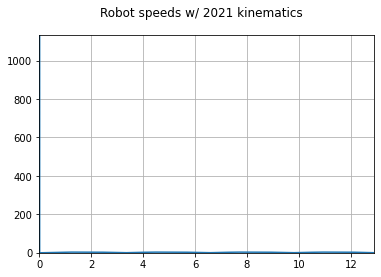

In [10]:
fig = plt.figure()

if False and num_robots > 1:
    fig, axs = plt.subplots(num_robots, sharex=True, sharey=True)
    fig.suptitle('Robot speeds w/ 2021 kinematics')

    time = df[df['robot_id'] == 0]['time']
    max_speed = df['speed'].max()
    for robot_id, ax in enumerate(axs):
        ax.set_ylim([0, max_speed])
        robot = df[df['robot_id'] == robot_id]
        speed = robot['speed']
        ax.plot(time, speed)
else:
    fig.suptitle('Robot speeds w/ 2021 kinematics')
    ax = fig.add_subplot(111, autoscale_on=False, xlim=(0, max_time), 
                                                  ylim=(0, max_speed * 1.25))

    time = df[df['robot_id'] == 0]['time']
    max_speed = df['speed'].max()
    
    ax.set_ylim([-5, 5])
    # ax.set_ylim([y_min, y_max])
    robot = df[df['robot_id'] == 0]
    speed = robot['speed'] #['pref_vel_x'] #
    ax.grid()
    ax.plot(time, speed)


In [11]:
# Save plot
# fig.savefig(f'plot/{file_name}.jpg', dpi=200)